###Τεχνολογία και Αναάλυση Εικόνων και Βίντεο

---
---
##<center> Ομάδα: 35 </center>
#####<center>Βαρδάκης Χριστόφορος: el18883</center>
#####<center>Σκουρτσή Δήμητρα Άννα: el18044</center>
---
---

## 1. Θεωρητικό Μέρος

**α)** Το πρόβλημα που διαπραγματεύεται αυτό το άρθρο είναι η εύρεση μιας νέας τεχνικής κωδικοποίησης εικόνων. Η τεχνική που προτείνεται χρησιμοποιεί και τεχνικές πρόβλεψης και τεχνικής μετασχηματισμών. Προτείνουν την κατασκευή μια Gaussian πυραμίδας, μέσω βαθυπερατών φιλτραρισμάτων και υποδειγματοληψία (κάθε φορά οι διαστάσεις της εικόνας μειώνονται στο μισό) με 5x5 συμμετρικό πυρήνα, η οποία θα χρησιμοποιηθεί για την κατασκευή μιας Laplacian πυραμίδας, μέσω των διαφορών των επιπέδων της Gaussian πυραμίδας αντί για τη χρήση του Laplacian τελεστή. Τέλος, πρετείνουν την κβαντοποίηση της εικόνας βασιζόμενοι στην εντροπία μιας εικόνας (το ελάχιστο πλήθος bits που χρειάζονται για την κωδικοποίηση της εικόνας).

**β)** Το Gauss φίλτρο στην ουσία εξομαλύνει την εικόνα, κανοντας blur τις λεπτομέρειες μέσω της εφαρμογής του πυρήνα. Αν δεν χρησιμοποιούταν το gauss φίλτρο και γινόνται μόνο υποδειγματοληψία θα αλλιωνόνταν η εικόνα λόγω αναδιπλώσεων. Οι διαφορές που προκύπτουν από τα επίπεδα της Gauss πυραμίδας θα χρησιμεύσουν στην κατασκευή της Laplacian πυραμίδας.

**γ)** Το πρόβλημα της κωδικοποίησης λύνεται από την Laplacian πυραμίδας, αφού η δομή της επιτρεπεί την πρόβλεψη της αρχικής εικόνας από τα προηγούμενα επίπεδα της. Έτσι μπορούμε αντί για την αρχική εικόνα να κωδικοποιήσουμε τα επίπεδα της Laplacian πυραμίδας.Τα επιπεδα αυτά, λόγω της χαμηλής εντροπίας τους και των επαναλαμβανώμενων φιλτραρισμάτων και υποδειγματοληψιών απο τα οποία προέκυψαν, μπορούν να κωδικοποιηθούν πιο αποδοτικά και με μικρότερο ρυθμό δειγματοληψίας. 

**δ)** Για να ανακτήσουμε την εικόνα από την Laplacian πυραμίδα αρκεί σε κάθε επίπεδο i να προσθέσουμε την μεγέθυνση (EXPAND) του επόμενου (i+1) επιπέδου. Με τον τρόπο αυτό παράγεται για κάθε επίπεδο i μία ενδιάμεση εικόνα g[i] η οποία αντιστοιχεί στο αντίστοιχο επίπεδο της Gaussian πυραμίδας .Έτσι η αρχική εικόνα είναι ισοδύναμη με την ενδιάμεση εικόνα του επιπέδου 0. Η διαδικασία ανάκτησης της αρχικής εικόνας I από την Laplacian πυραμίδα L βάθους Ν δίνεται από την παρακάτω αναδρομική εξίσωση:

`g[i] = L[i] + EXPAND(g[i+1]),i ∈ 0,N όπου I = g[0] , g[Ν]=L[N]`

Επειδή οι πληροφορία που θα χανόταν κατά την σμύκρινση της εικόνας διατηρούνται στο προηγούμενο επίπεδο της Laplacian πυραμίδας, η ανάκτηση της εικόνας μέσα από τη διαδικασία αυτή είναι τέλεια.

## 2. Εργαστηριακό Μέρος


In [ ]:
import cv2
from matplotlib import pyplot as plt
from skimage import data
import urllib.request
import numpy as np
from scipy.stats import entropy as ent


### Α. Υλοποίηση Αλγορίθμου


In [ ]:
#α
def GKernel(a):
    w = [1/4-a/2, 1/4, a, 1/4, 1/4-a/2]
    return np.array([[i*j for i in w]for j in w])

In [ ]:
#β
def GREDUCE(I,h):
  filtered = cv2.filter2D(I,-1,h)
  res = cv2.resize(filtered,(I.shape[1]//2,I.shape[0]//2),interpolation=cv2.INTER_CUBIC)

  return res

In [ ]:
#γ
def GPyramid(I,a,depth):
  kernel = GKernel(a)
  result = [I]
  for i in range (depth):
    result.append(GREDUCE(result[-1],kernel))
  return result

In [ ]:
#δ
def GEXPAND(I,h):
  resized = cv2.resize(I,(I.shape[1]*2,I.shape[0]*2),interpolation=cv2.INTER_CUBIC)
  result = cv2.filter2D(resized,-1,h)

  return result

In [ ]:
#ε
def LPyramid(I,a,depth):
  kernel = GKernel(a)
  L = []
  if (len(I.shape) == 3):
    for c in range(3):
      L_C=[]
      G = GPyramid(I[:,:,c],a,depth)
      for i in range (depth -1):
        L_C.append(np.subtract(G[i]+128,GEXPAND(G[i+1],kernel)))
      L_C.append(G[depth-1])
      L.append(L_C)
  else:
    L_C=[]
    G = GPyramid(I,a,depth)
    for i in range (depth -1):
      L_C.append(np.subtract(G[i]+128,GEXPAND(G[i+1],kernel)))
    L_C.append(G[depth-1])
    L.append(L_C)
  return L

In [ ]:
# στ)
def LPyramidDecode(L,a):
  kernel = GKernel(a)
  if(len(L)==3):
    decoded = np.zeros((len(L[0][0]), len(L[0][0][0]), len(L)))
    for c in range(len(L)):
      tmp = L[c][-1]
      for i in range(len(L[c])-2,-1,-1):
        tmp = L[c][i] + GEXPAND(tmp,kernel) - 128
      decoded[:,:,c] = tmp
  else:
    decoded = L[0][-1]
    for i in range(len(L[0])-2,-1,-1):
      decoded = L[0][i] + GEXPAND(decoded,kernel) - 128

  return decoded.astype(np.uint8)

In [ ]:
#βοηθητική συνάρτηση για το ερώτημα ζ
def Quantize_image(I,b):
  bins = np.linspace(0,255,b)
  Q = np.digitize(I,bins) + 255//(2*b)
  return Q.astype(np.uint8)

In [ ]:
#ζ
def L_Quantization(I,a,depth,bins):
  L = LPyramid(I,a,depth)
  Pyramid = []
  for Color in L:
    C=[]
    for i,Img in enumerate(Color):
      C.append(Quantize_image(Img,bins[i]))
    Pyramid.append(C)
  return LPyramidDecode(Pyramid,a), Pyramid

### Β. Δοκιμές Αλγορίθμου


Φορτώνουμε τις εικόνες

In [ ]:
HTTP_response = urllib.request.urlopen('http://www.image.ntua.gr/~tpar/LABimage/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR_Lena = cv2.imdecode(arr,-1)
Lena = cv2.cvtColor(BGR_Lena,cv2.COLOR_BGR2RGB)
Camera = data.camera()

###α) 

In [ ]:
def Question_A (I):
  depth = 5

  a = 0.5
  I_Pyramid = LPyramid(I,a,depth)
  I_Decoded = LPyramidDecode(I_Pyramid,a)

  if(len(I_Pyramid) == 3):
    cmap = 'viridis'
    for c in range(len(I_Pyramid)):
      f,Ax = plt.subplots(1,depth,figsize=(20,20))
      for i in range (depth):
        Ax[i].imshow(I_Pyramid[c][i])
        Ax[i].set_title(f"Layer {i}")
  else:
    cmap = 'gray'
    f,Ax = plt.subplots(1,depth,figsize=(20,20))
    for i in range (depth):
      Ax[i].imshow(I_Pyramid[0][i], cmap = 'gray')
      Ax[i].set_title(f"Layer {i}")

  f,Ax = plt.subplots(1,2,figsize=(10,10)) 
  Ax[0].imshow(I, cmap = cmap)
  Ax[1].imshow(I_Decoded, cmap = cmap)
  Ax[0].set_title("Original Image ")
  Ax[1].set_title("Decoded Image ")

  plt.show()
  if(I == I_Decoded).all():
    print("\nThe Images are equal")
  else: print("\nThe Images do not match")

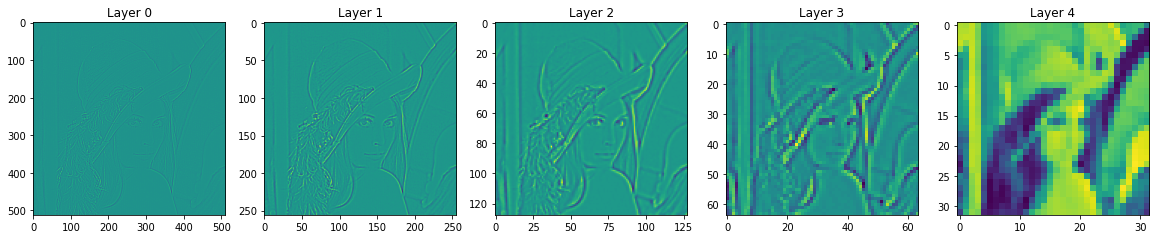

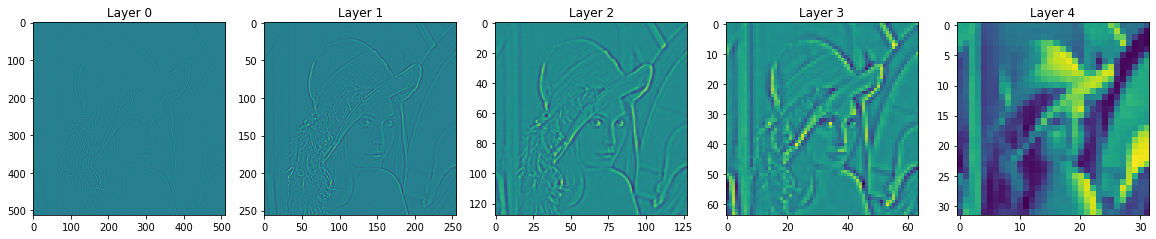

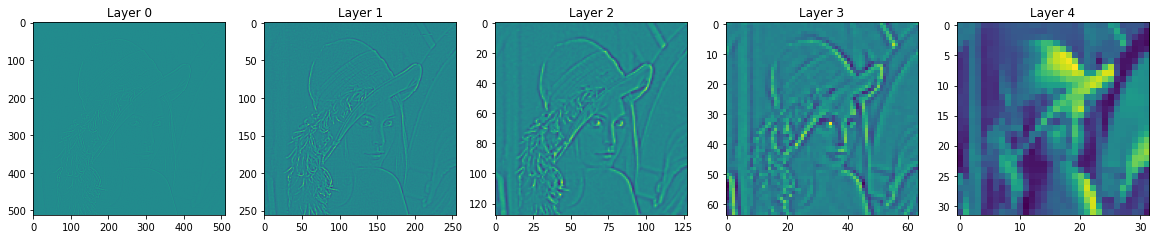

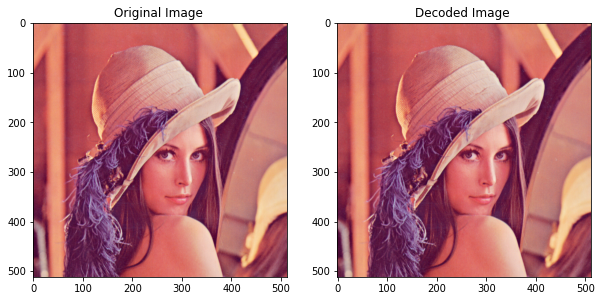


The Images are equal


In [ ]:
Question_A(Lena)

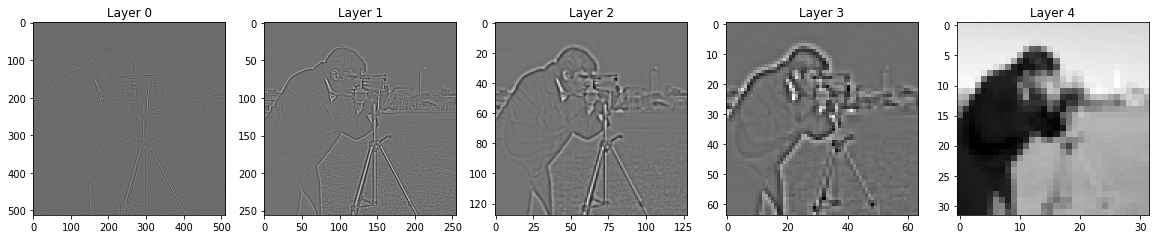

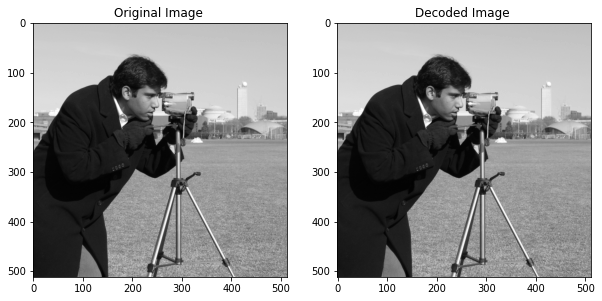


The Images are equal


In [ ]:
Question_A(Camera)

####Σχολιασμός
Παρακάτω φαίνονται οι Laplacian πυραμίδες για τις δύο εικόνες καθώς και η σύγκριση της αρχικής και της εικόνας μετά από κωδικοποίηση και αποκωδικοποίηση. Παρατηρούμε ότι και στην περίπτωση της έγχρωμης Lenas και στην περίπτωση της ασπρόμαυρης εικόνας με την κάμερα, η αρχική και η αποκψδικοποιημένη εικόνα είναι ίδιες.

###β)

In [ ]:
def Question_B (I):
  depth = 5
  if(len(I.shape)==3):
    cmap = 'viridis'
  else:
    cmap = 'gray'

  f,Ax = plt.subplots(1,1,figsize=(5,5))
  Ax.set_title("Original Image")
  Ax.imshow(I,cmap = cmap)
  flag = 0
  res = []
  for i in range(2,8):
    a = i/10
    I_Pyramid = LPyramid(I,a,depth)
    I_Decoded = LPyramidDecode(I_Pyramid,a)
    res.append(I_Decoded)
    if(len(I_Pyramid) == 3):
      cmap = 'viridis'
    else:
      cmap = 'gray'
    f,Ax = plt.subplots(1,depth+1,figsize=(20,20))
    for i in range (depth):
      Ax[i].imshow(I_Pyramid[0][i], cmap = cmap)
      Ax[i].set_title(f"a =  {a}")
    Ax[-1].set_title(f"Decoded a = {a}")
    Ax[-1].imshow(I_Decoded, cmap=cmap)
    if(I == I_Decoded).all():
      flag += 1
    else:
      flag -= 1
  plt.show()
  if flag == 6:
    print("All images match")
  else:
    print(6-flag, " images do not match!")


  return res

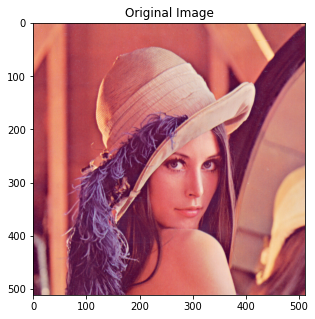

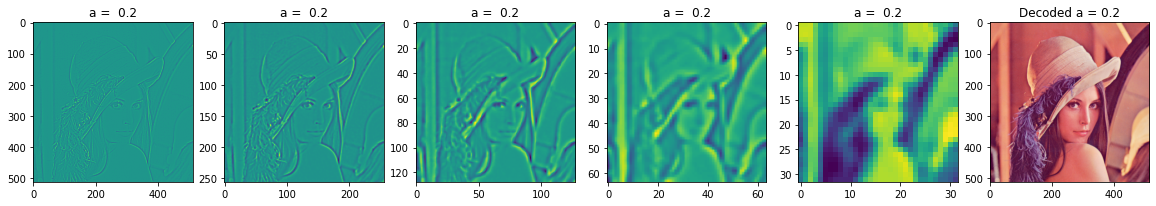

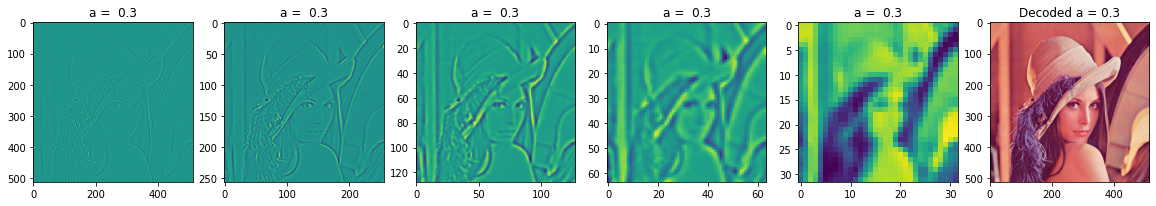

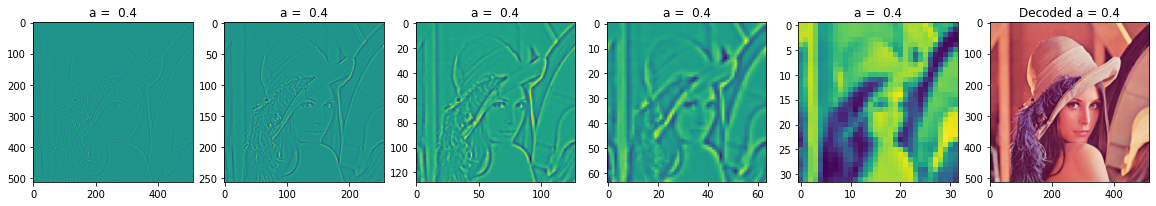

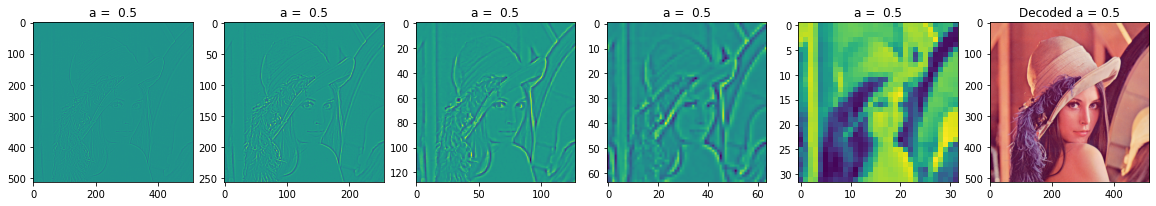

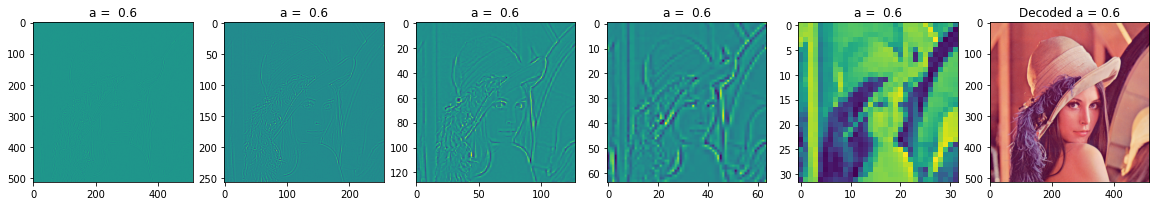

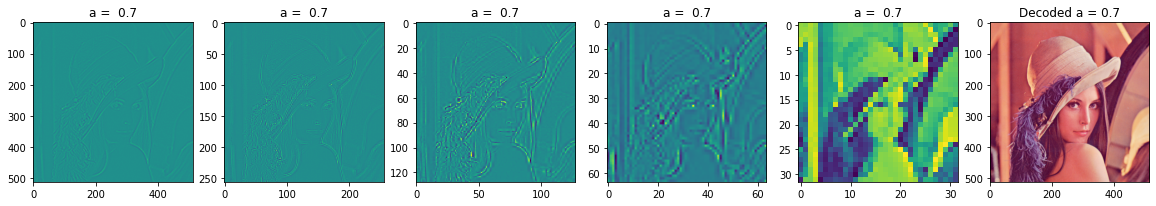

All images match


In [ ]:
Lena_a = Question_B(Lena)

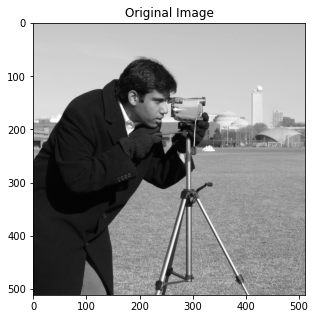

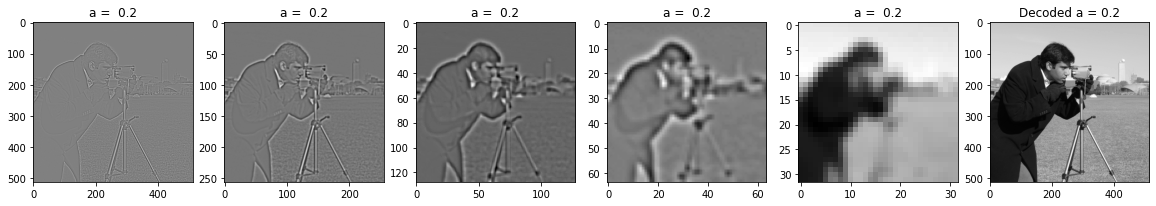

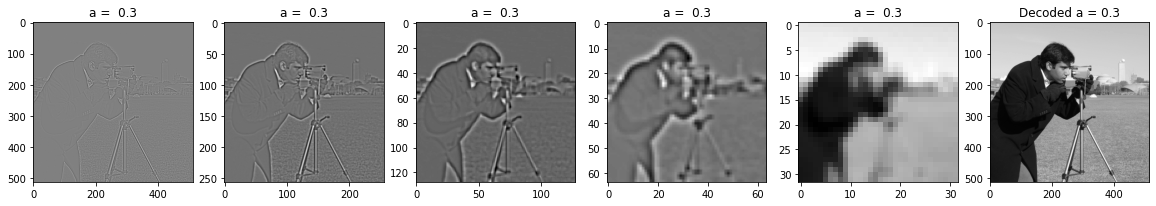

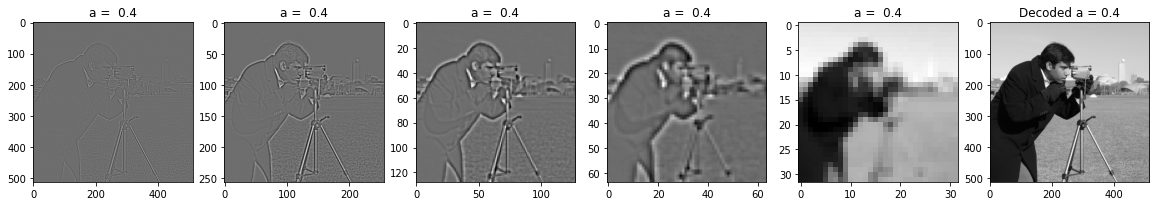

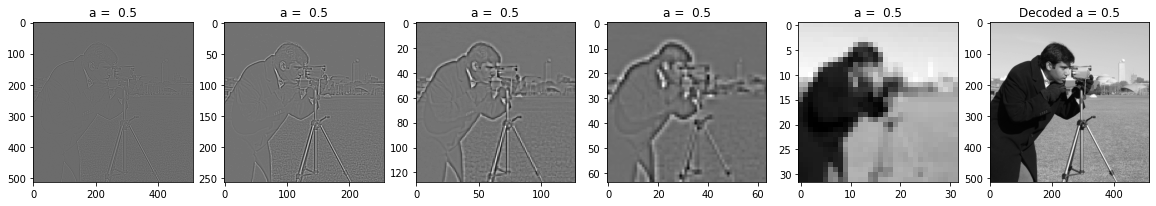

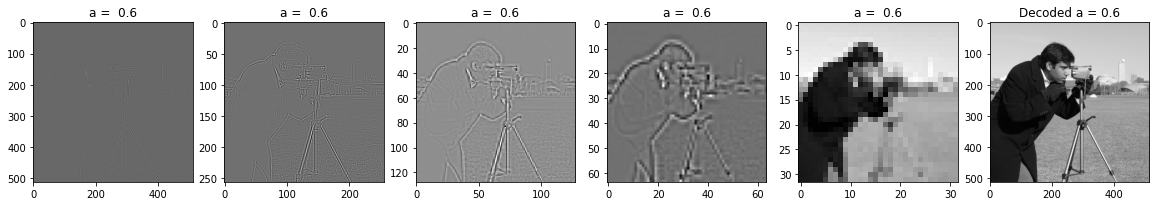

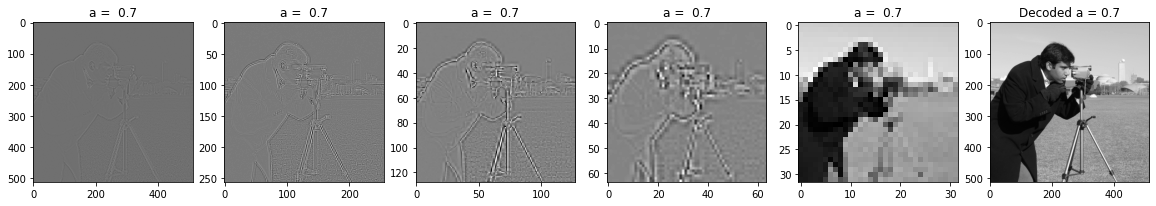

All images match


In [ ]:
Camera_a = Question_B(Camera)

####Σχολιασμός
Παρατηρούμε ότι η αποκωδικοποιημένη εικόνα παραμένει ίδια με την αρχική ανεξαρτήτως του a. Για σύγκριση αποτυπώνονται τα επίπεδα της Laplacian πυραμίδας, για ένα από τα χρώματα, για τα διαφορετικά α. Όσο αυξάνεται το α, τόσο πιο θολή (blurred) είναι οι εικόνες σε κάθε επίπεδο της πυραμίδας.

###γ) 

In [ ]:
def Question_C (I):
  if(len(I.shape)==3):
    cmap = 'viridis'
  else:
    cmap = 'gray'
  a = 0.5

  f,Ax = plt.subplots(1,1,figsize=(5,5))
  Ax.set_title("Original Image")
  Ax.imshow(I,cmap = cmap)

  flag = 0
  res = []
  for depth in range(2,8):    
    f,Ax = plt.subplots(1,depth+1,figsize=(20,20))
    I_Pyramid = LPyramid(I,a,depth)
    I_Decoded = LPyramidDecode(I_Pyramid,a)
    res.append(I_Decoded)
    for i in range (depth):
      Ax[i].imshow(I_Pyramid[0][i], cmap = cmap)
      Ax[i].set_title(f"depth =  {depth}")
    Ax[-1].set_title(f"Decoded depth = {depth}")
    Ax[-1].imshow(I_Decoded, cmap=cmap)
    if(I == I_Decoded).all():
      flag += 1
    else:
      flag -= 1
  plt.show()
  
  if flag == 6:
    print("All images match")
  else:
    print(6-flag, " images do not match!")

  return res

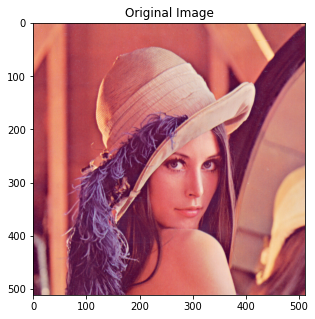

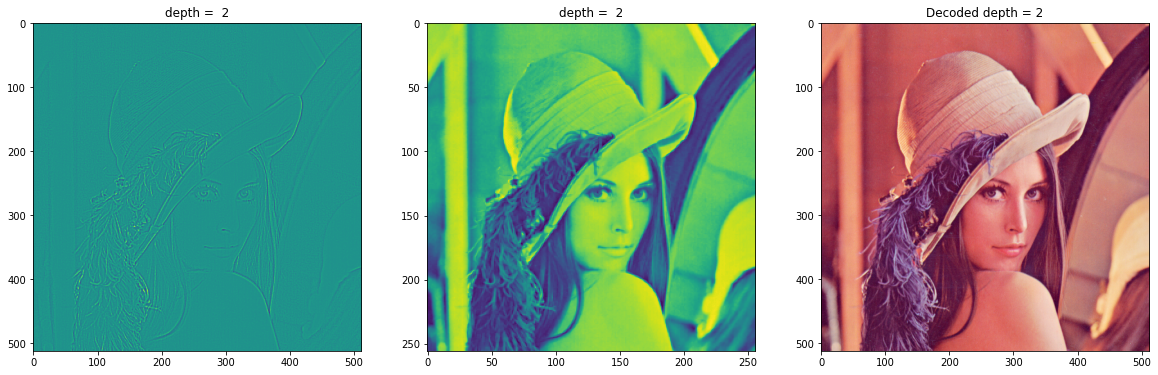

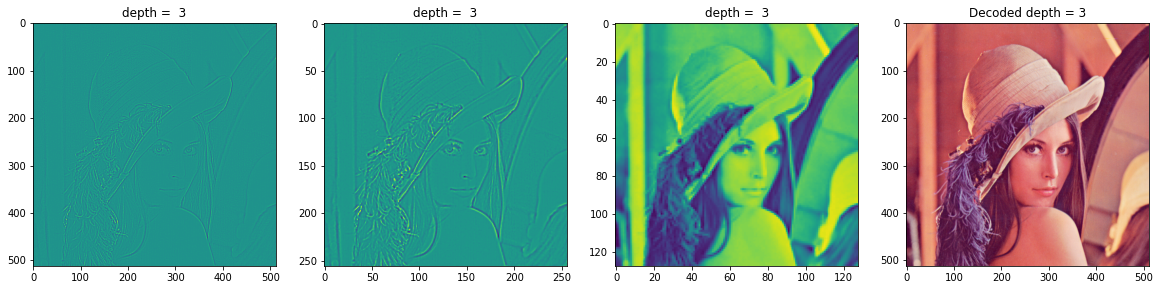

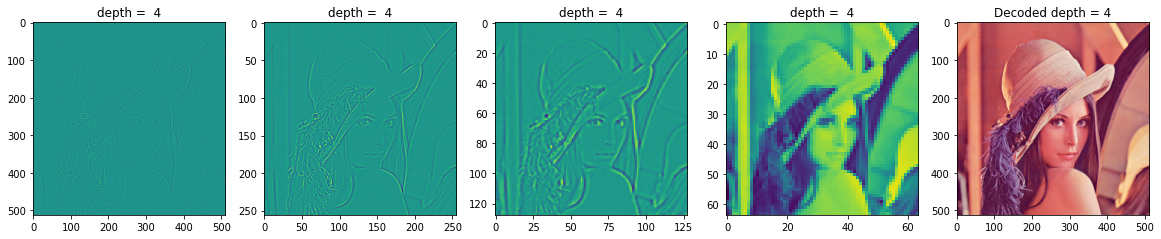

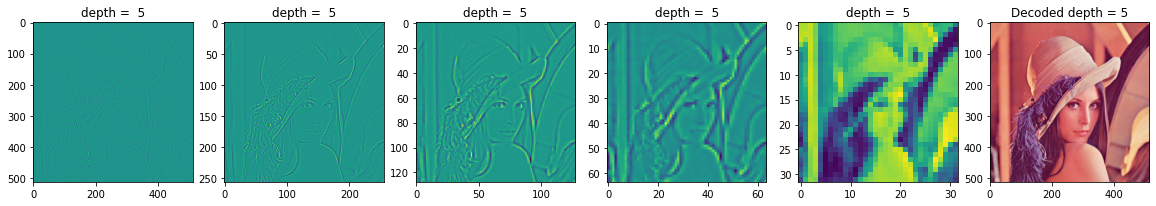

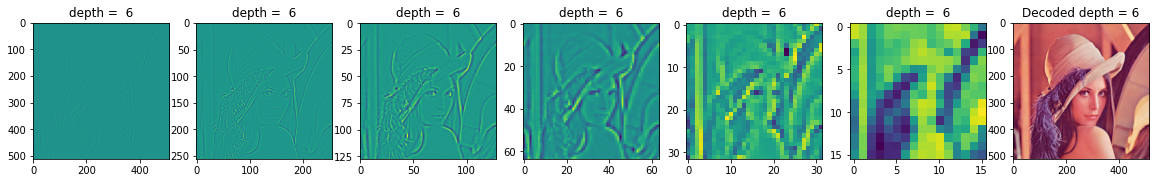

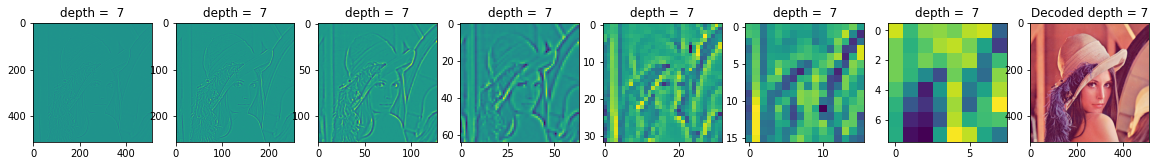

All images match


In [ ]:
Lena_Depth = Question_C(Lena)

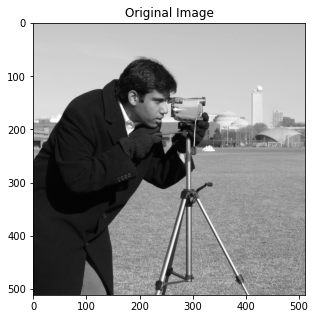

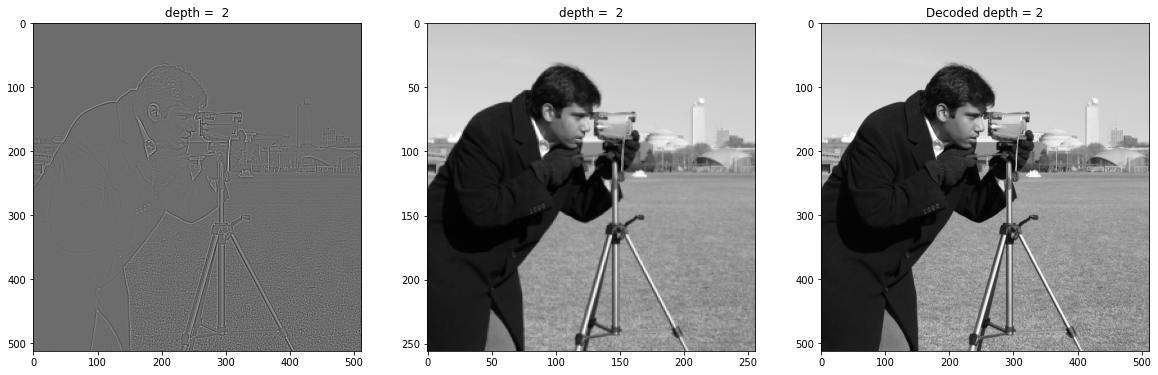

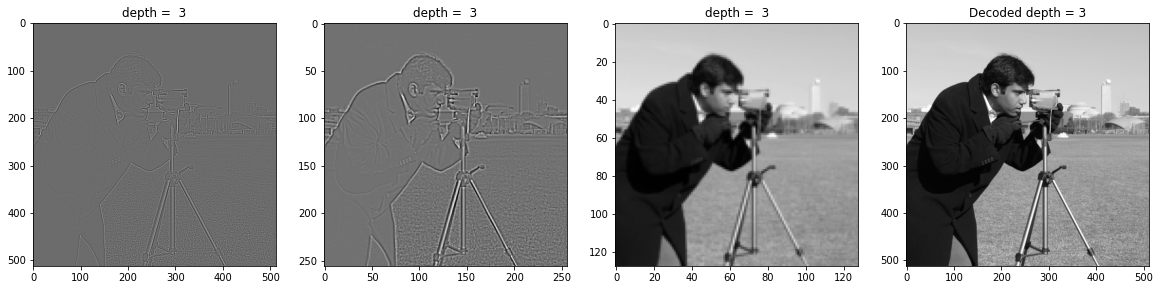

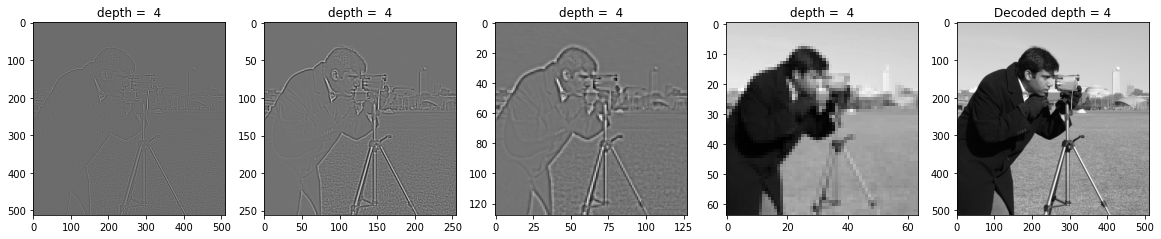

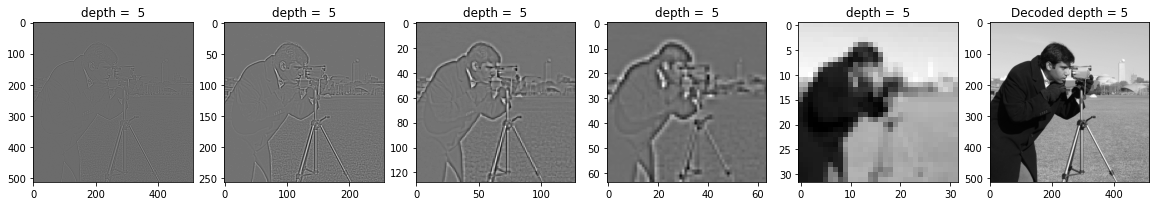

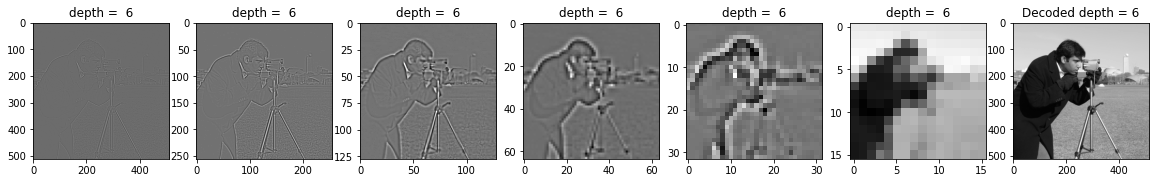

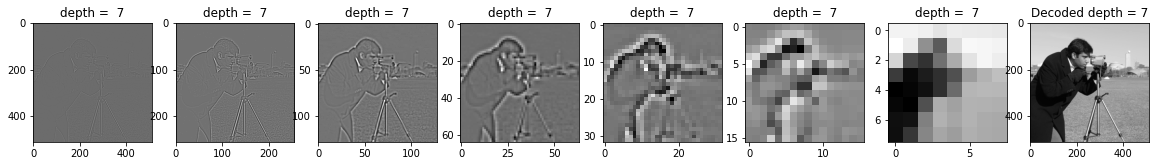

All images match


In [ ]:
Camera_Depth = Question_C(Camera)

####Σχολιασμός

Παρατηρούμε ότι η αποκωδικοποιημένη εικόνα παραμένει ίδια με την αρχική ανεξαρτήτως του depth. (Και πάλι απεικονίζεται η πυραμίδα για ένα από τα χρώματα της εικόνας)

###δ) 

In [ ]:
# Function that calculates histograms of a laplacian Pyramid
def calc_hist (Pyramid,a,depth): 
  
  histograms = []
  for c in range(len(Pyramid)):
    sum_hist = np.zeros([256,1], np.float64)
    temp = []
    for n in range(depth):
      hist = cv2.calcHist([Pyramid[c][n]], [0], None, [256], [0, 256])
      sum_hist += hist
      temp.append(hist)
    temp.append(sum_hist)
    histograms.append(temp)
  return histograms

In [ ]:
def Question_D(I):
    entr_a = []
    entr_x = []
    if (len(I.shape) == 3):
      l = I.shape[2]
      height = 9
    else: 
      l = 1
      height = 3
    f,Ax = plt.subplots(l,6,figsize = (20,height)) 
    for i in range(2,8):
      a = i/10
      I_Pyramid = LPyramid(I,a,5)
      sum_hist = calc_hist(I_Pyramid,a,5)
      entr = 0
      Colors = len(I_Pyramid)
      for c in range(Colors):
        entr += ent(sum_hist[c][-1],base = 2)[0]
        if(l == 1):
          Ax[i-2].set_title(f"a = {a}")
        else:
          Ax[c][i-2].set_title(f"a = {a}")
        for h in range(len(sum_hist[c])):
          if(l == 1):
            Ax[i-2].plot(sum_hist[c][h])
          else:
            Ax[c][i-2].plot(sum_hist[c][h])
      entr_a.append(entr/len(I_Pyramid))
      entr_x.append(a)
    f,Ax = plt.subplots(1,1,figsize = (3,3)) 
    Ax.set_title("Entropy for different values of a")
    Ax.plot(entr_x,entr_a,'-p')
    plt.show()
    for i,a in enumerate(entr_x):
      print(f"Entropy for a {a}  = {entr_a[i]}")

    entr_d = []
    entr_x = []
    f,Ax = plt.subplots(l,6,figsize = (20,height))  
    for depth in range(2,8):
      entr = 0
      I_Pyramid = LPyramid(I,0.4,depth)
      sum_hist = calc_hist(I_Pyramid,0.4,depth)
      for c in range(len(I_Pyramid)):
        entr += ent(sum_hist[c][-1],base = 2)[0]
        if(l == 1):
          Ax[depth-2].set_title(f"depth = {depth}")
        else:
          Ax[c][depth-2].set_title(f"depth = {depth}")
        for h in range(len(sum_hist[c])):
          if(l == 1):
            Ax[depth-2].plot(sum_hist[c][h])
          else:
            Ax[c][depth-2].plot(sum_hist[c][h])
      entr_d.append(entr/len(I_Pyramid))
      entr_x.append(depth)
    f,Ax = plt.subplots(1,1,figsize = (3,3)) 
    Ax.set_title("Entropy for different values of depth")
    Ax.plot(entr_x,entr_d,'-p')
    plt.show()
    for i,d in enumerate(entr_x):
      print(f"Entropy for depth {d}  = {entr_d[i]}")

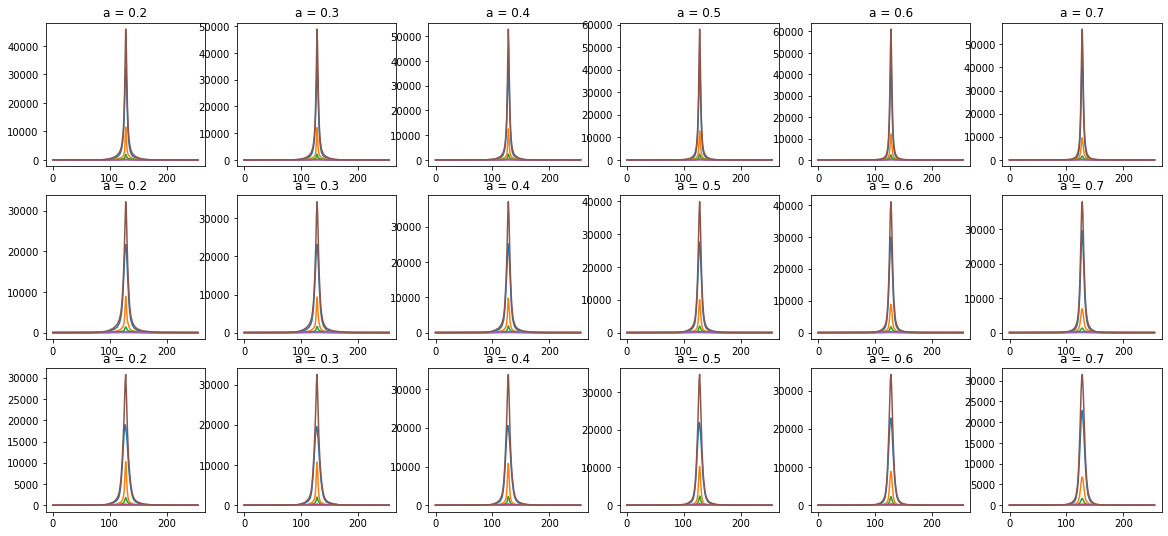

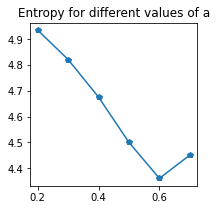

Entropy for a 0.2  = 4.935331326317308
Entropy for a 0.3  = 4.821306386993844
Entropy for a 0.4  = 4.675428557712773
Entropy for a 0.5  = 4.4996203568133595
Entropy for a 0.6  = 4.360085440360609
Entropy for a 0.7  = 4.450709102713174


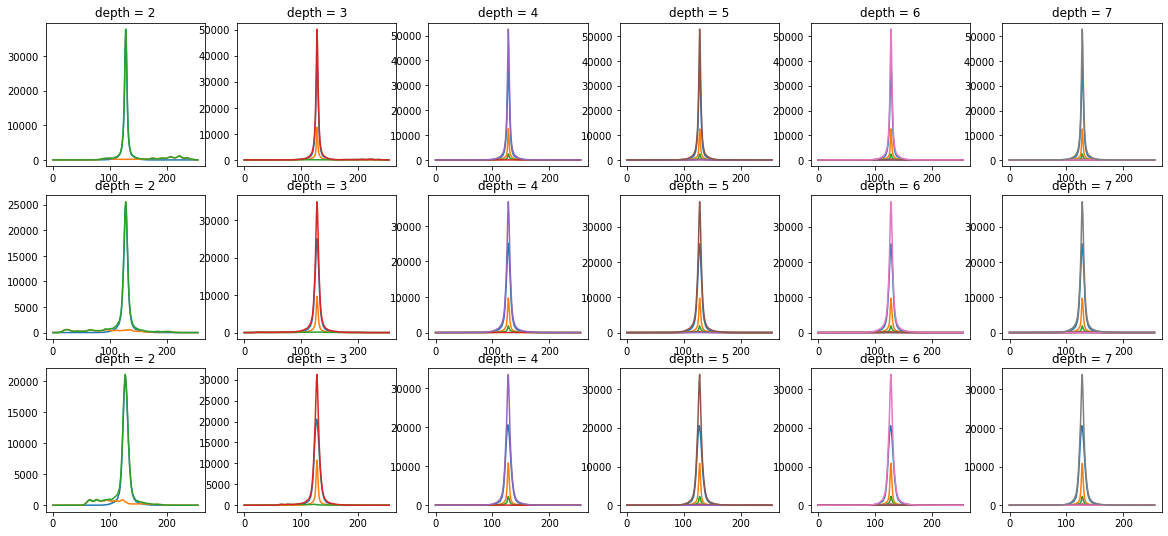

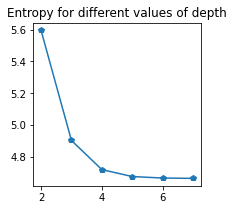

Entropy for depth 2  = 5.597307004942693
Entropy for depth 3  = 4.90295275595788
Entropy for depth 4  = 4.7190816957965955
Entropy for depth 5  = 4.675428557712773
Entropy for depth 6  = 4.666031925688563
Entropy for depth 7  = 4.6638285791458385


In [ ]:
Question_D(Lena)

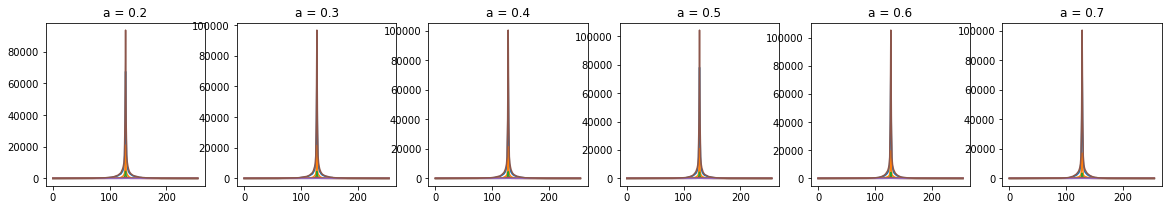

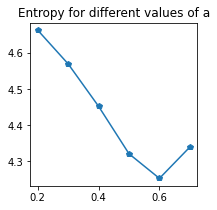

Entropy for a 0.2  = 4.663533839561279
Entropy for a 0.3  = 4.569888506879943
Entropy for a 0.4  = 4.452082955186173
Entropy for a 0.5  = 4.320260434835963
Entropy for a 0.6  = 4.251861670022173
Entropy for a 0.7  = 4.338907740697772


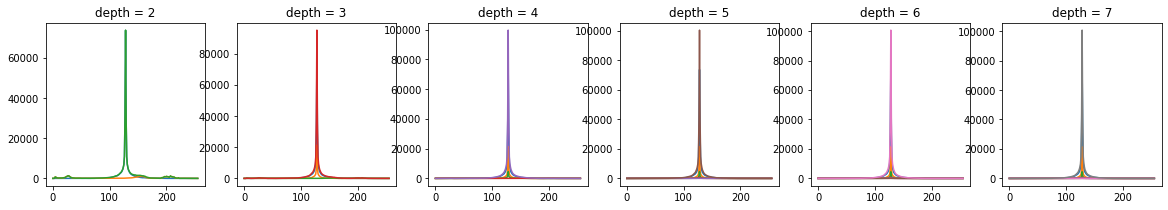

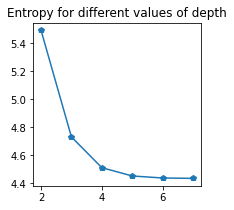

Entropy for depth 2  = 5.495444200495714
Entropy for depth 3  = 4.731574086144559
Entropy for depth 4  = 4.511412003268512
Entropy for depth 5  = 4.452082955186173
Entropy for depth 6  = 4.4377990156805165
Entropy for depth 7  = 4.434890693420476


In [ ]:
Question_D(Camera)

####Σχολιασμός
Παραπάνω παρατίθονται τα ιστογράμματα ανά χρώμα για κάθε παράμετρο.
Παρατηρούμε ότι και στις δύο εικόνες η εντροπία παρουσιάζει ελάχιστο στο a = 0.6, όπως ήταν αναμενόμενο σύμφωνα με το άρθρο. Επίσης παρατηρούμε ότι όσο μεγαλώνει το βάθος της Laplacian πυραμίδας τόσο μειώνεται η εντροπία.

###ε)

In [ ]:
def Question_E(I):
    histograms = []
    f,Ax = plt.subplots(1,1,figsize = (5,5)) 
    x = []
    for i in range(2,8):
      a = i/10
      x.append(a)
      entr_a = []
      entr = 0
      I_Pyramid = LPyramid(I,a,5)
      histograms.append(calc_hist(I_Pyramid,a,5))

    for depth in range(0,5):
      ent_d = []
      for a in range(0,6):
        entr = 0
        for c in range(len(I_Pyramid)):
          entr += ent(histograms[a][c][depth],base = 2)[0]
        ent_d.append(entr/len(I_Pyramid))
      Ax.set_title("Entropy for different layers")
      Ax.plot(x,ent_d,'-p',label=f"Layer {5-depth-1}")
      Ax.legend()


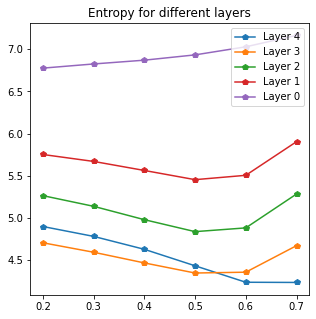

In [ ]:
Question_E(Lena)

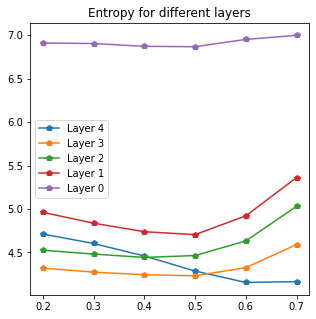

In [ ]:
Question_E(Camera)

####Σχολιασμός
Παρατηρούμε το το ελάχιστο των εντροπιών κάποιον επιπέδων βρίσκεται στο 0.6 ενώ κάποιον άλλον στο 0.5. Σε κάθε περίπτωση οι τιμές της εντροπίας για κάθε επίπεδο για α=0.6 είναι αν όχι η ελάχιστη, πολύ κοντά στην ελάχιστη. Οπότε βασιζόμενοι στο άρθρο και τα αποτελέσματα των γραφημάτων μας καταλήγουμε στο συμπέρασμα ότι η βέλτιστη τιμή για το α είναι 0.6.

###στ)

In [ ]:
def Question_St(I,bins):
  if(len(I.shape)==3):
    cmap = 'viridis'
  else:
    cmap = 'gray'
  Quantized, Pyramid = L_Quantization(I,0.6,5,bins)
  entr = 0
  sum_hist = calc_hist(Pyramid,0.6,5)
  Colors = len(Pyramid)
  for c in range(Colors):
    entr += ent(sum_hist[c][-1],base = 2)[0]
  entr /= len(Pyramid)

  f,Ax = plt.subplots(1,2,figsize=(8,8))
  Ax[0].imshow(I, cmap = cmap)
  Ax[1].imshow(Quantized, cmap = cmap)
  Ax[0].set_title("Original Image ")
  Ax[1].set_title("Decoded Image ")

  plt.show()
  
  print("Entropy: ", entr)

  if(I == Quantized).all():
    print("The Images are equal\n")
  else: print("The Images do not match\n")

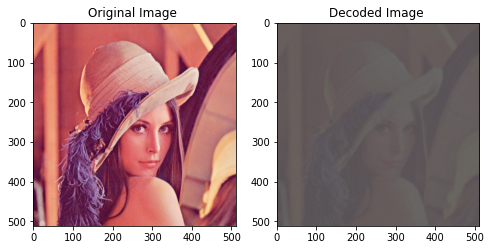

Entropy:  1.8938480851827866
The Images do not match



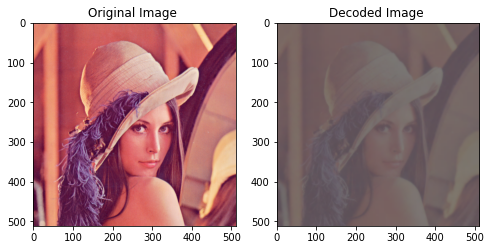

Entropy:  1.3269931329426115
The Images do not match



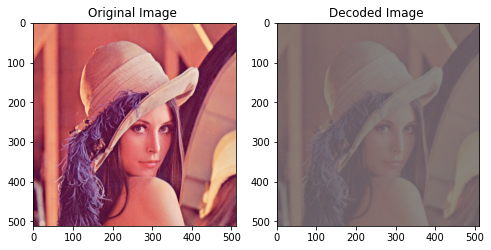

Entropy:  2.1387868289271004
The Images do not match



In [ ]:
Question_St(Lena,[5,10,15,20,25])
Question_St(Lena,[10,20,30,40,50])
Question_St(Lena,[30,35,40,45,50])

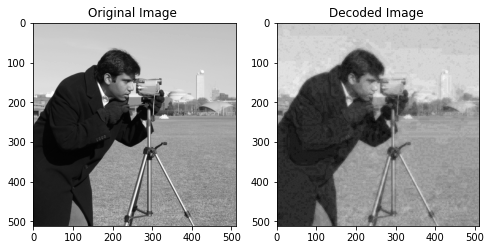

Entropy:  1.8803347799443697
The Images do not match



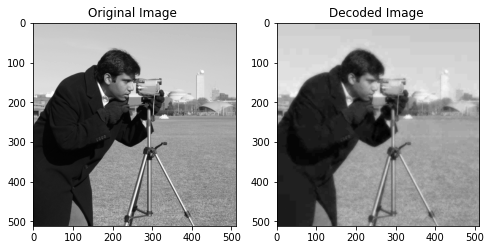

Entropy:  1.495674520334641
The Images do not match



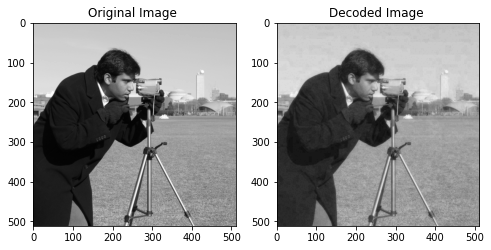

Entropy:  2.2908615509756363
The Images do not match



In [ ]:
Question_St(Camera,[5,10,15,20,25])
Question_St(Camera,[10,20,30,40,50])
Question_St(Camera,[30,35,40,45,50])

####Σχολιασμός
Παρατηρούμε ότι οι αποκωδικοποιημένες εικόνες δεν είναι ίδιες με την αρχική, παρ'όλα αυτά είναι αρκετά κοντά, ειδικά στην ασπρόμαυρη εικόνα αλλα και στα εκάστοτε επίπεδα χρώματος της εγχρωμης εικόνας(βλ. παρακατω) . Επίσης όταν κβαντίζουμε την πυραμίδα με μικρό αριθμό bins η εντροπία της κβαντισμένης πυραμίδας μειώνεται αισθητά σε σχέση με την μη κβαντισμένη πυραμίδα.

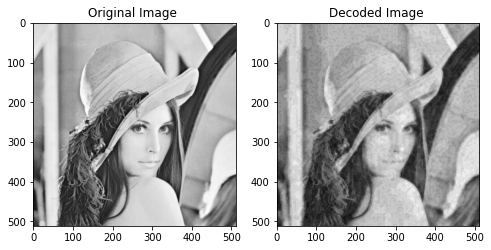

Entropy:  1.878141914623751
The Images do not match



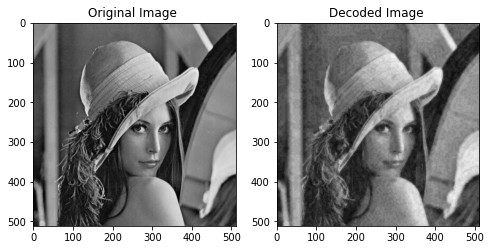

Entropy:  1.9157313083606278
The Images do not match



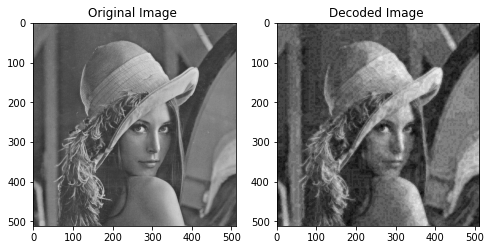

Entropy:  1.8876710325639805
The Images do not match



In [ ]:
Question_St(Lena[:,:,0],[5,10,15,20,25])
Question_St(Lena[:,:,1],[5,10,15,20,25])
Question_St(Lena[:,:,2],[5,10,15,20,25])